In [788]:
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import re

In [789]:
def read_image_data(file_path):
    with open(file_path) as file:
        lines = file.readlines()

    height, width, expected_stars = map(int, lines[0].split(' '))
    pixel_data = lines[1:]
    return height, width, expected_stars, pixel_data


In [790]:
def parse_pixels(pixels):
    pattern = re.compile(r'\((\d+), (\d+), (\d+)\)')
    matches = pattern.findall(pixels)
    return [(int(r), int(g), int(b)) for r, g, b in matches]


In [791]:
def load_image(height, width, pixel_data):
    flat_image = [pixel for pixels in pixel_data for pixel in parse_pixels(pixels)]
    return np.array(flat_image, dtype=np.uint8).reshape(height, width, 3)


In [792]:
def preprocess_image(gray_image):
    blurred_image = cv.GaussianBlur(gray_image, (5, 5), 0)
    return blurred_image

In [793]:
def calculate_average_intensity(image):
    return np.mean(image)

In [794]:
def determine_preprocessing_flag(image):
    average_intensity = calculate_average_intensity(image)
    return average_intensity > 50  

In [795]:
def find_contours(image, preprocess_flag=False):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    if preprocess_flag:
        gray_image = preprocess_image(gray_image)
        threshold_value = 200
    else:
        threshold_value = 100

    _, thresh = cv.threshold(gray_image, threshold_value, 255, cv.THRESH_BINARY)
    contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    return contours

In [796]:
def draw_contours(image, contours):
    result = image.copy()
    for contour in contours:
        x, y, w, h = cv.boundingRect(contour)
        center_x, center_y = x + w/2, y + h/2
        print(f'({center_x}, {center_y})')
        cv.rectangle(result, (x, y), (x+w, y+h), (255, 0, 0), 1)

    return result


In [797]:
image_path = "input3.txt"
height, width, expected_stars, pixel_data = read_image_data(image_path)
original_image = load_image(height, width, pixel_data)

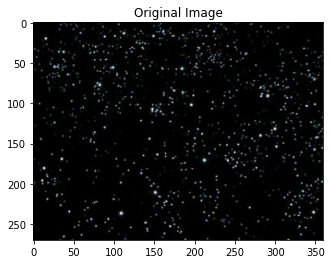

In [798]:
plt.imshow(original_image, cmap=plt.cm.gray)
plt.title("Original Image")
plt.show()

In [799]:
preprocess_flag = determine_preprocessing_flag(original_image)
contours = find_contours(original_image, preprocess_flag)

In [800]:
print(f'Automatic Preprocessing Flag: {preprocess_flag}')
print(f'Number of Expected Stars: {expected_stars}')
print(f'Number of Detected Stars: {len(contours)}')

Automatic Preprocessing Flag: False
Number of Expected Stars: 26
Number of Detected Stars: 525


In [801]:
print("Central points of each founded star:")
result_image_with_contours = draw_contours(original_image, contours)

Central points of each founded star:
(317.0, 269.5)
(255.5, 268.5)
(216.5, 268.5)
(189.0, 269.0)
(114.5, 268.5)
(38.0, 265.5)
(60.0, 264.0)
(333.0, 263.0)
(163.0, 262.0)
(183.5, 260.0)
(179.5, 259.0)
(142.0, 259.0)
(94.5, 259.0)
(264.5, 255.5)
(142.0, 256.0)
(98.5, 255.5)
(338.5, 254.5)
(238.0, 253.5)
(180.5, 254.0)
(121.5, 254.0)
(51.5, 254.0)
(331.0, 253.0)
(170.5, 253.0)
(78.0, 253.0)
(56.5, 252.0)
(175.5, 251.0)
(164.0, 248.5)
(236.5, 247.5)
(139.5, 248.5)
(89.5, 248.0)
(57.5, 247.5)
(280.0, 247.0)
(215.5, 246.0)
(67.5, 246.0)
(340.5, 243.5)
(93.0, 244.0)
(72.0, 244.5)
(345.0, 242.5)
(337.5, 242.5)
(173.0, 242.5)
(330.0, 239.5)
(324.5, 239.5)
(319.0, 240.0)
(241.5, 239.5)
(218.5, 240.0)
(180.5, 238.5)
(153.0, 238.5)
(314.0, 237.5)
(331.0, 236.0)
(224.0, 236.0)
(110.0, 237.0)
(348.5, 235.5)
(212.0, 235.0)
(45.0, 234.5)
(64.5, 232.5)
(330.5, 229.5)
(269.0, 230.0)
(227.0, 230.0)
(160.5, 230.0)
(68.0, 230.0)
(228.5, 226.5)
(163.5, 227.0)
(34.0, 227.0)
(320.5, 226.0)
(172.0, 226.0)
(154

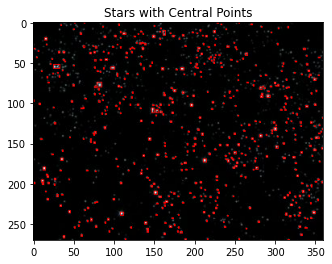

In [802]:
plt.imshow(result_image_with_contours)
plt.title("Stars with Central Points")
plt.show()